In [8]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


from sklearn import datasets


In this file we will look at Breast Cancers Data. SKlearn has many datasets that you can import including one on Breast Cancer Research. First thing we will do is import it and convert it to DataFrame. Then we will explore it a bit:

In [11]:
Cancerdata=datasets.load_breast_cancer()
Cancer_feat=pd.DataFrame(Cancerdata.data, columns=Cancerdata.feature_names)

# Let't see key descriptors in this data set.
Cancerdata.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
# Here is a description of the dataset

print(Cancerdata['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Few things I want to point out from this description:

1. We have 569 data points each having 30 measures. So, it is 30-dimensional dataset.
2. Out of these 569 points, 212 are malignant and 357 are benign tumors (0 is cancerous and 1 is benign)
3. Values of each measure are quite different. For example, smoothness (mean) varies between 0.053 and 0.163, while area (worst) between 185.2 and 4254.0. This is an important fact since PCA gives preference to high variance, but we can't directly compare these two features. This will require some type of normalization or scaling of data, so that the values can be directly compared.
4. "Missing Attribute Values: None" means we dont have any missing values, so we don't have to worry about clean up. We will check this pat later anyway. 

In [16]:
Cancer_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As you can see we have all the data, but we are missing target values (identifyers on which tumors are malignant and which are cancerous. Let's create another data frame with target values:

In [19]:
Cancer_tar=Cancerdata.target
Cancer_tar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:
Cancer_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Here we can see that we dont have any null values, so nothing is missing. 

Worth noting here that in class column 0 means malignant and 1 means benign tumor. You can check that by checking target_names or just counting.

Since we have 30 features, trying to do pairplot can be quite taxing, so instead I will look at heat map of correlations of various features:

<Axes: >

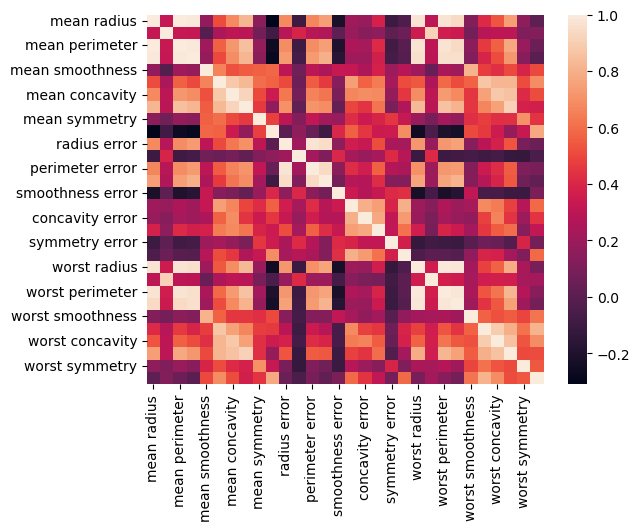

In [24]:
sns.heatmap(Cancer_feat.corr().round(2))

What does this tell us? High positive and negative correlation is not very useful and so there should be a way to simplify this data.
Let's look at just means (first 10 columns). Here I will use pairplot. It might take few seconds to generate. Look at where we have high correations and where we have small correlation.

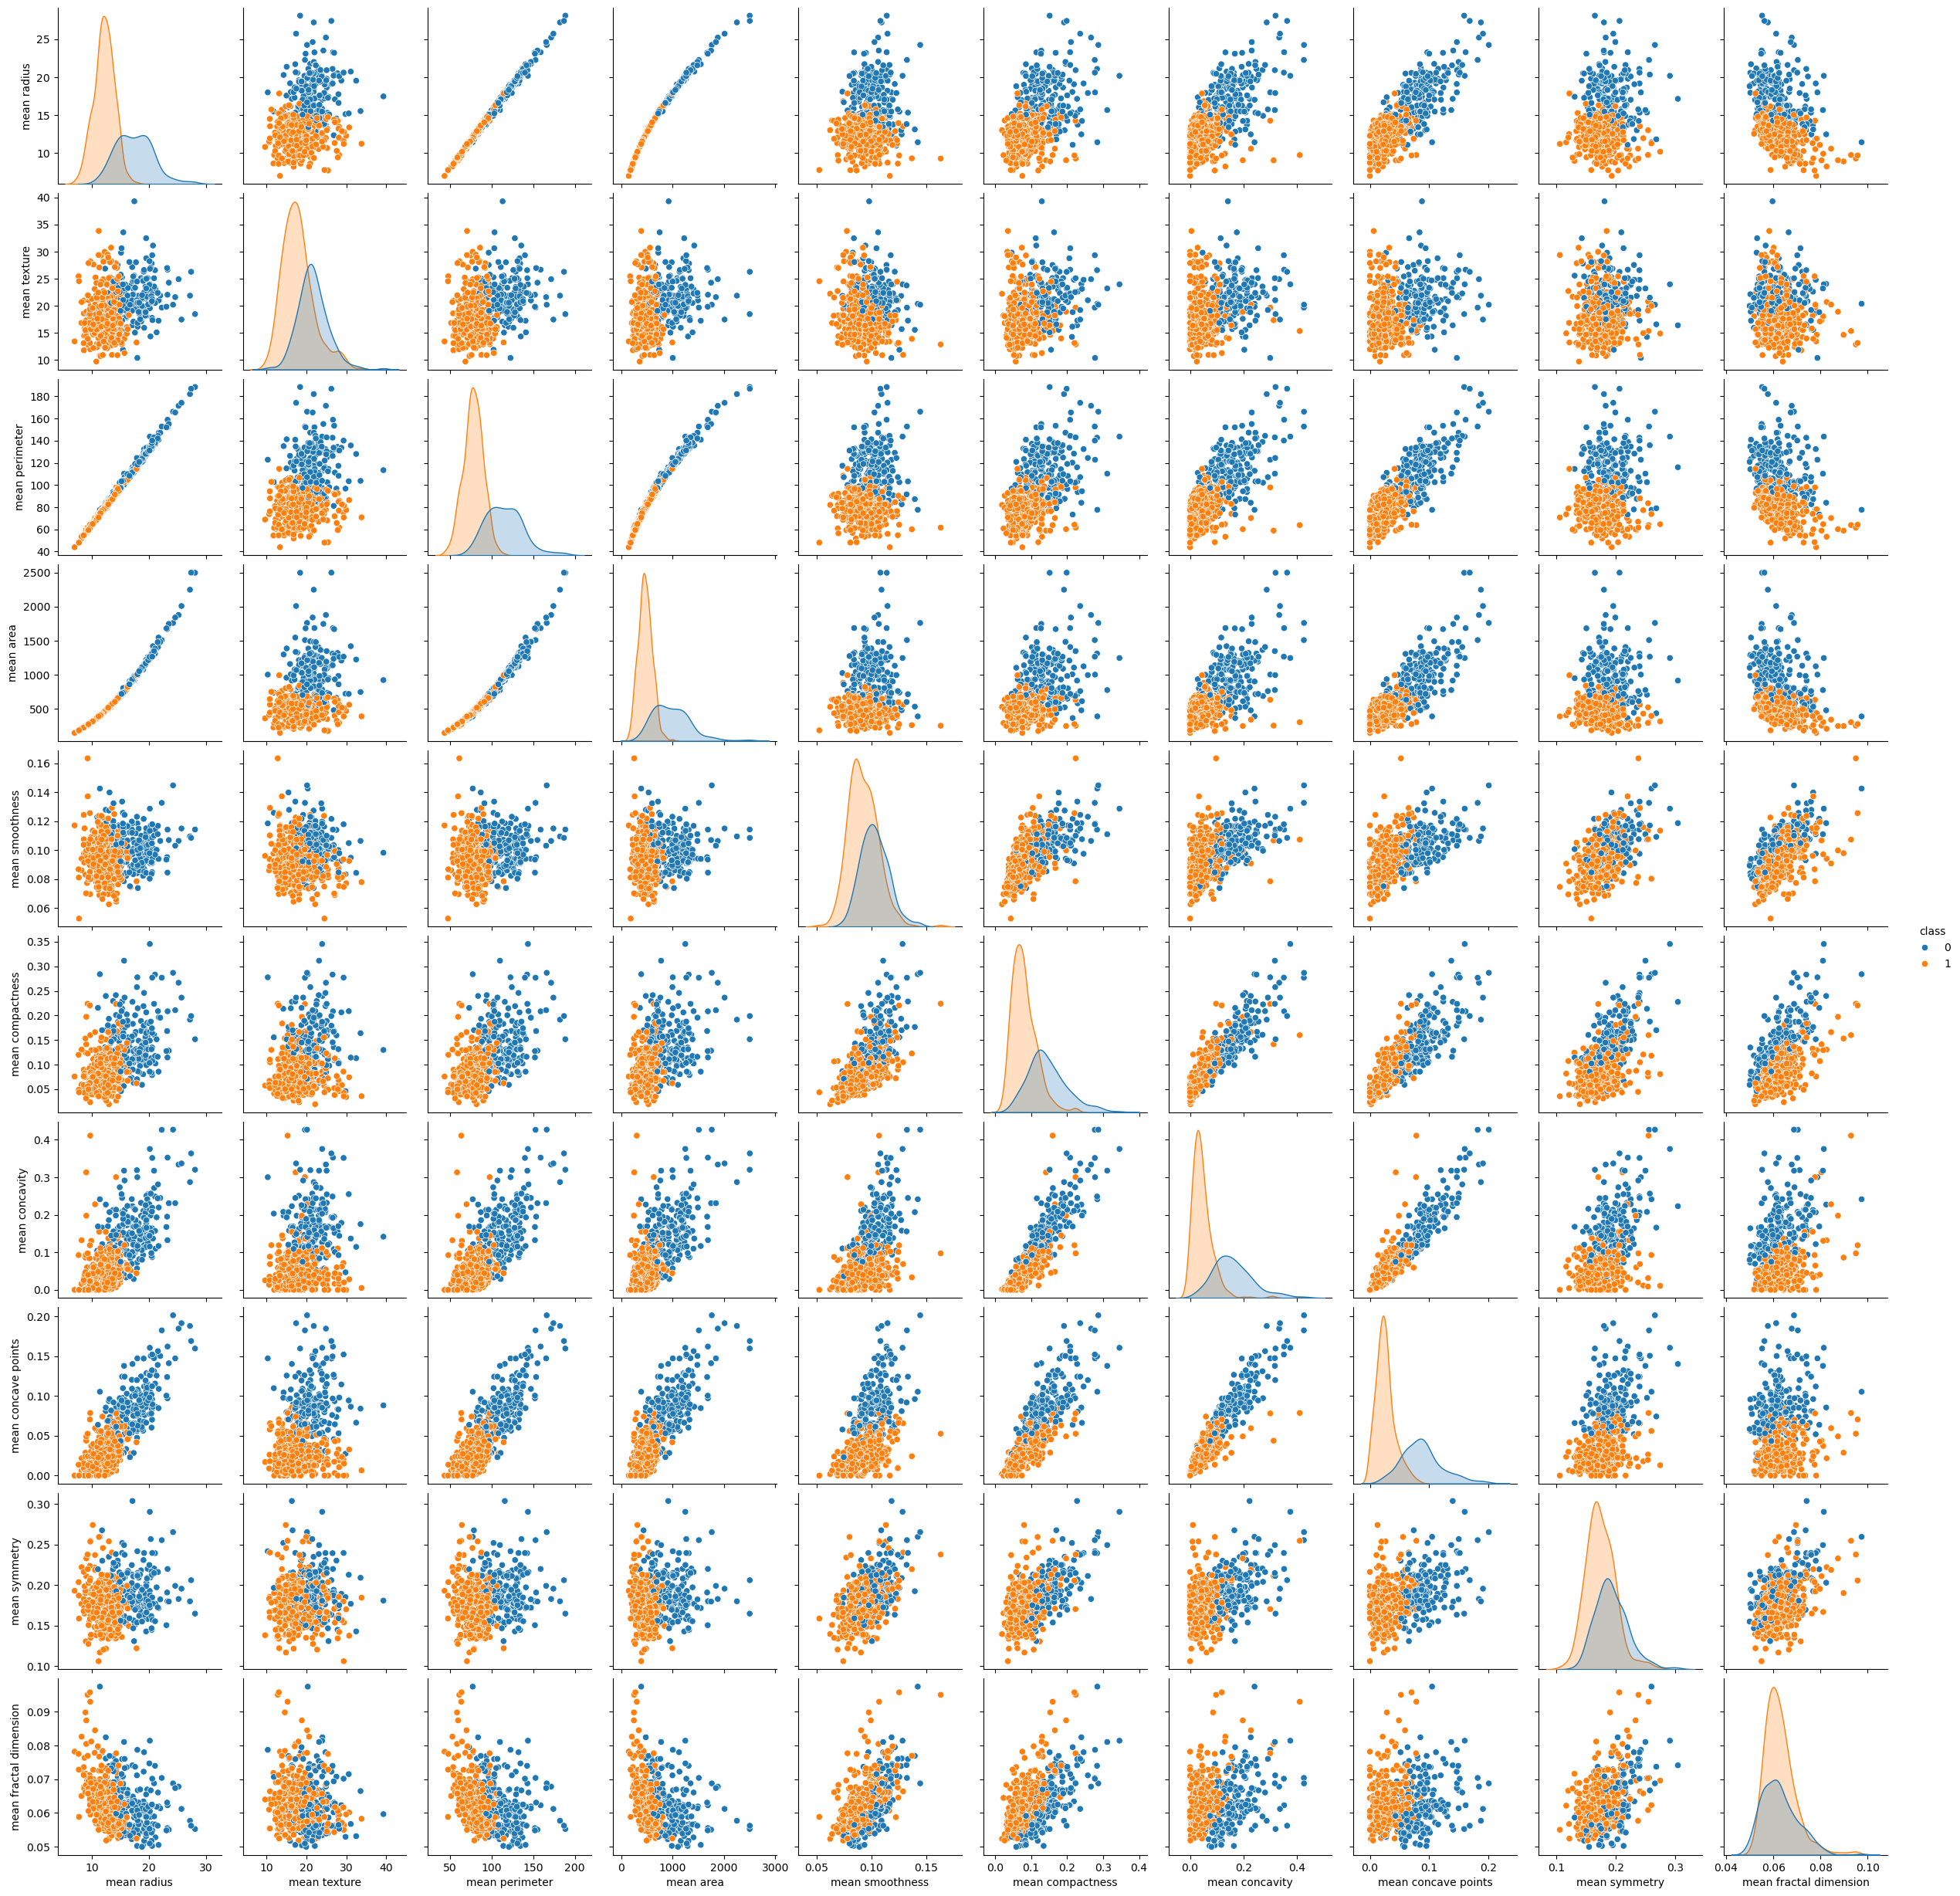

In [27]:
means=Cancer_feat.iloc[:,:10]
means['class']=Cancer_tar
sns.pairplot(means, hue="class")

Notice that mean radius, mean area and mean perimeter are very highly correlated (first, third and fourth columns/rows), so we don't need all of it. One of those coulmn is good. In this case I will not be removing anything yet but this is something that you can think about.

You can do a lot more exploration of data here. In fact, this part is quite important. You can't do meaningful data analysis without actually understanding the data you have.

### Scaling Data

For now though, I will move forward. Next thing we need to normalize the data. This is related to third point I made before regarding different variances. In order, to have somewhat meaningful PCA test, I should normalize the data. There are many different ways of doing it. I will go about it using Standard scaler (in essence a z-score):

In [30]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(Cancer_feat)

# it is going to be an array after transform, so we need to convert it to data frame again
Scaled_Cancer=pd.DataFrame(scaler.transform(Cancer_feat), columns=Cancerdata.feature_names)

Scaled_Cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


As you can see the values are more comparable now. In fact, we can see that:

In [33]:
Scaled_Cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


### PCA

Now we will start PCA. The goal is twofold. First we want to reduce dimensionality of our data using PCA. Second we want to be able to predict weather the tumor is malignant or benign based on measurements. In order to do the second part, we will split our data into training set and testing sets. Training set is to teach our machine to predict, and testing set will be used to test how well it did. We will take 20% of our data points randomly to be our test data. The remaning 80% will be training data.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Scaled_Cancer, Cancer_tar, test_size=0.2, random_state=0)

Note below that we will use fit_transform on training set and transform on testing set. We don't want to use testing set to train our PCA algorithm.

In [39]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [41]:
# here are our eigenvalues
pca.explained_variance_ratio_

array([0.43766898, 0.19696535])

So the total percent of information is about 63%, we can add more components to make it better, but for now I will leave as is. I will use Logistic Regression for training and testing data:

In [44]:
# training
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# predictions
y_pred=classifier.predict(X_test_pca)


In [46]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[44,  3],
       [ 6, 61]], dtype=int64)

Confusion Matrix contains correct and wrong predictions. Values on the main diagonal (44 and 61) are correct guesses. The other two are wrong guesses. So overall this is about 91% guess rate. Not bad. Keep in mind this is for test data that wasn't part of training and we only used two principal components.

Let's visualize some of this. First here are our first two principal components (note: this is training data) :

Text(0, 0.5, 'PC2')

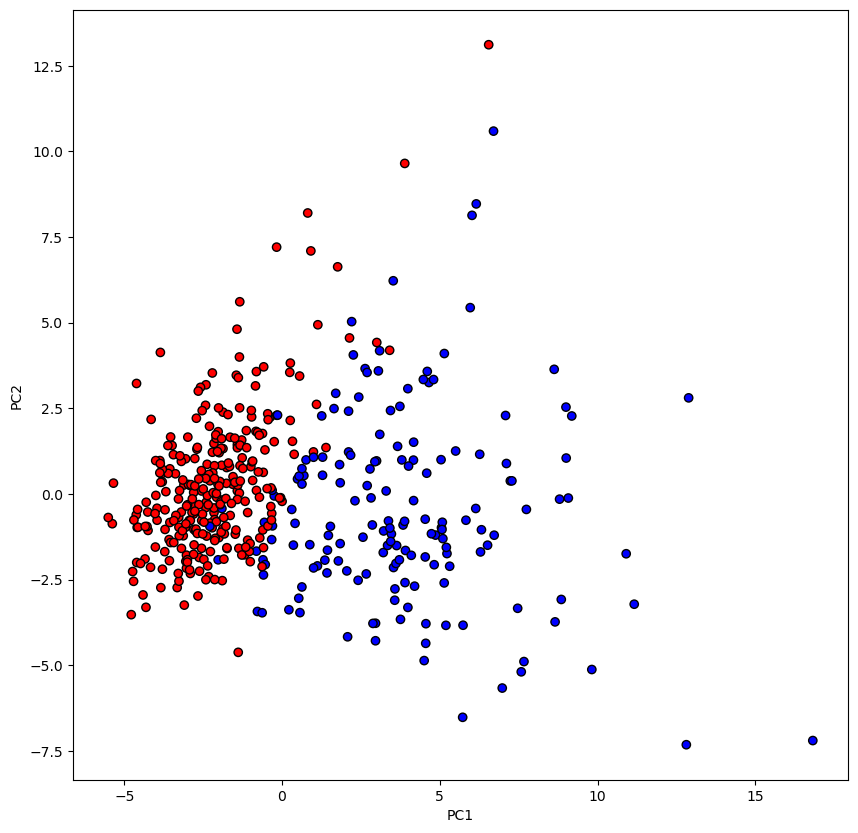

In [49]:
plt.figure(figsize=(10,10))


color = ['r' if y == 1 else 'b' for y in y_train]
plt.scatter(X_train_pca[:,0],X_train_pca[:,1] ,c=color,edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

Now, the same but with Regression division line.

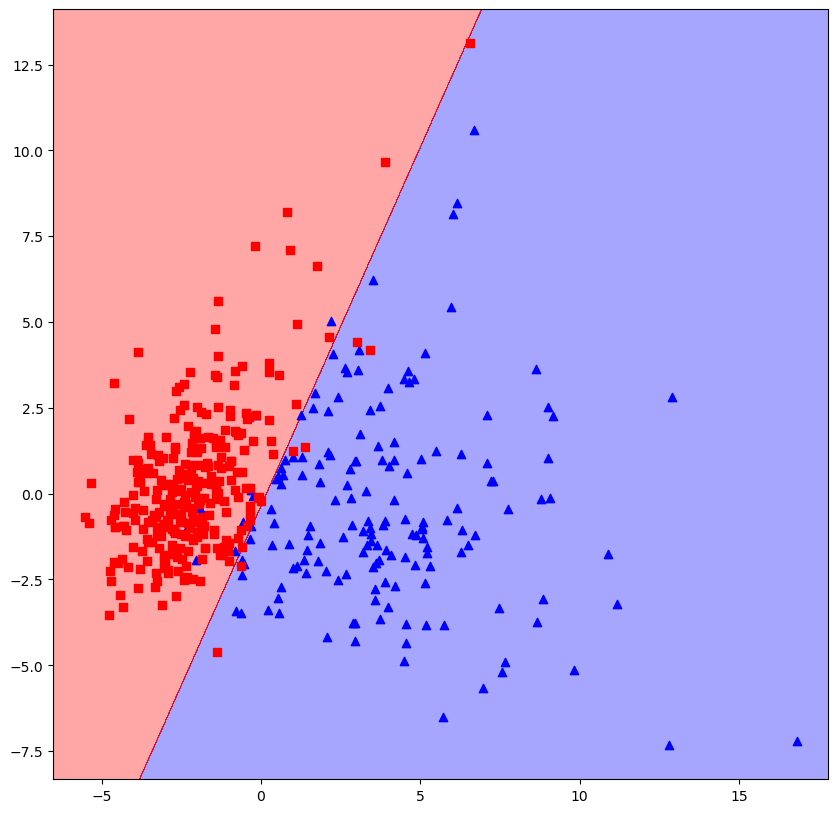

In [52]:
plt.figure(figsize=(10, 10))
X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.35, cmap = ListedColormap(['blue', 'red']))

# plot the data
for label,marker,color in zip(
    range(2),('^', 's'),('blue', 'red')):
    
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                c = color,
                marker=marker, 
                )

And finally, lets plot out test data with the same regression line.

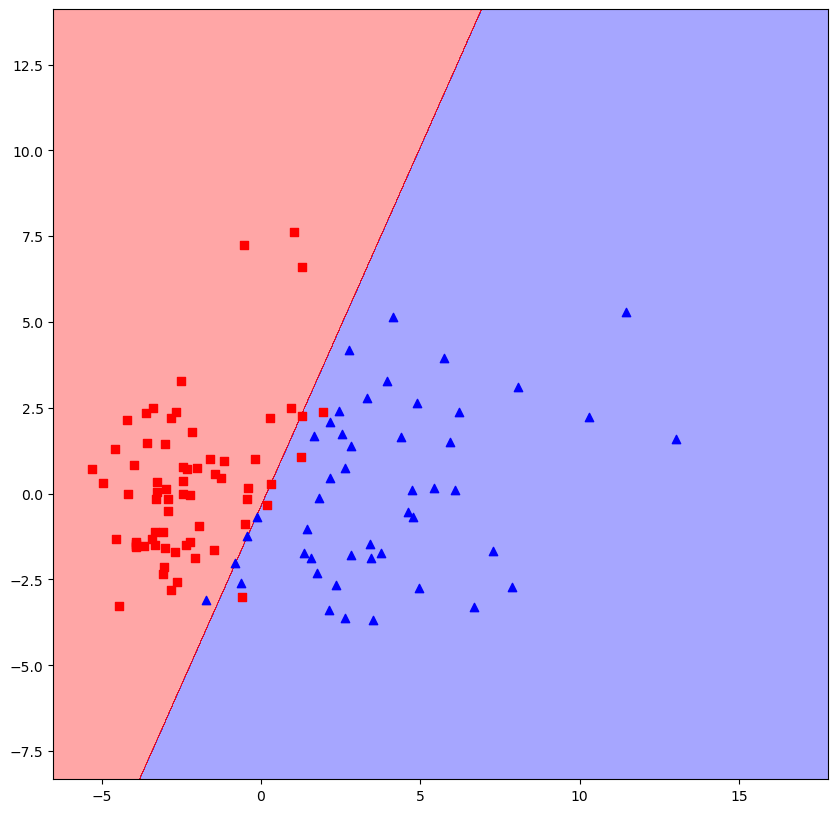

In [55]:
plt.figure(figsize=(10, 10))
X1, X2 = np.meshgrid(np.arange(start = X_train_pca[:, 0].min() - 1, stop = X_train_pca[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train_pca[:, 1].min() - 1, stop = X_train_pca[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.35, cmap = ListedColormap(['blue', 'red']))

# plot the data
for label,marker,color in zip(
    range(2),('^', 's'),('blue', 'red')):
    
    plt.scatter(X_test_pca[y_test == label, 0],
                X_test_pca[y_test == label, 1],
                c = color,
                marker=marker, 
                )